In [16]:
!pip install feature-engine 
!pip install imbalanced-learn
#!pip install pypls

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [41]:
# set random seed for reproducibility
np.random.seed(42)

df = pd.read_csv('bodyPerformance.csv')

df.duplicated().sum()
print(f'with duplicates:{df.shape}')
df.drop_duplicates(inplace=True)
print(f'without duplicates:{df.shape}')

df.rename(columns={"height_cm": "height", "weight_kg": "weight","body fat_%":"body_fat",
                   "sit and bend forward_cm":"sit_and_bend_forward","sit-ups counts":"sit-ups",
                   "broad jump_cm":"broad_jump","class":"performance"},inplace=True)

df.age = df.age.astype(int)

#gender = {'F':0,'M':1}
#df['gender'] =df['gender'].replace(gender)

df["BMI_val"]=round((df['weight']/(df['height'])/(df['height']))*10000,2)

def BMI (row):
    bmi = ((row.weight/row.height)/row.height)*10000
    if bmi>=18.5 and bmi < 25: 
        return 0 
    elif bmi < 18.5:
        return 1
    elif bmi >= 25 and bmi < 30:
        return 2
    else:
        return 3
    
df['BMI'] = df.apply(BMI,axis=1)

Class = {'A':0, 'B':1, 'C':2, 'D':3}
df['class'] =df['performance'].replace(Class)

df = df[(df["body_fat"] <= 70)]
df = df[(df["sit_and_bend_forward"] <= 50)]
df = df[(df["broad_jump"] >0)]


df.drop(['height','weight'],axis=1, inplace=True)

df = df[df['diastolic'] < df['systolic']]
df = df[df['diastolic'] >=10]

df["MAP"]=round((((2*df['diastolic'])+(df['systolic']))/3),2)
df.drop(['diastolic','systolic'],axis=1, inplace=True)
df.head()


with duplicates:(13393, 12)
without duplicates:(13392, 12)


,age,gender,body_fat,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI,class,MAP
0,27,M,21.3,54.9,18.4,60.0,217.0,C,25.34,2,2,96.67
1,25,M,15.7,36.4,16.3,53.0,229.0,A,20.50,0,0,93.33
2,31,M,20.1,44.8,12.0,49.0,181.0,C,24.18,0,2,112.00
3,32,M,18.4,41.4,15.2,53.0,219.0,B,23.35,0,1,99.67
4,28,M,17.1,43.5,27.1,45.0,217.0,B,22.41,0,1,89.00


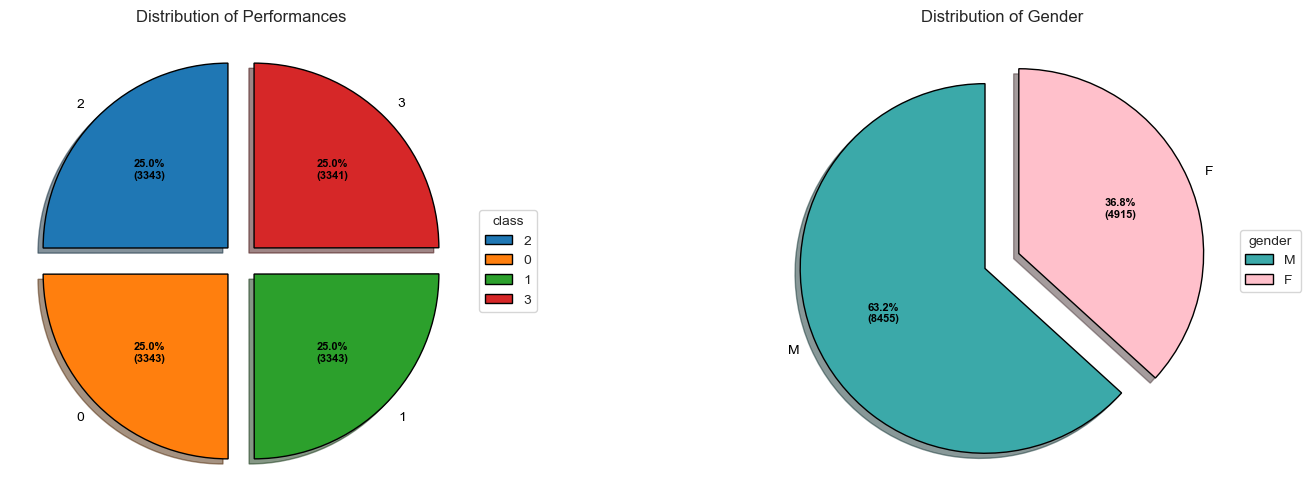

In [44]:
# Creating autocpt arguments
def pie(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute) if pct > 8 else ''

fig, axs = plt.subplots(1,2,figsize =(18, 6))

# class
wedges1, texts1, autotexts1 = axs[0].pie(df['class'].value_counts(),
                                      autopct = lambda pct: pie(pct, df['class'].value_counts()),
                                      explode = (.1, .1, .1, 0.1),
                                      labels = df['class'].value_counts().index, shadow = True, 
                                      startangle = 90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" }, 
                                      textprops = dict(color ="black"),)

# Adding legend
axs[0].legend(wedges1, df['class'].value_counts().index, title='class',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts1, size = 8, weight ="bold")
axs[0].set_title("Distribution of Performances")

# gender
wedges1, texts1, autotexts1 = axs[1].pie(df['gender'].value_counts(),
                                      autopct = lambda pct: pie(pct, df['gender'].value_counts()),
                                      explode = (0.1, .1), colors = ("#3BA9A9", "pink"),
                                      labels = df['gender'].value_counts().index, shadow = True, 
                                      startangle = 90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" }, 
                                      textprops = dict(color ="black"),)
 
# Adding legend
axs[1].legend(wedges1, df['gender'].value_counts().index, title='gender',
          loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts1, size = 8, weight ="bold")
axs[1].set_title("Distribution of Gender")

plt.show()

# split to train and test

In [25]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df, test_size=0.2, random_state=42)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 10697
No. of testing examples: 2675


# body fat

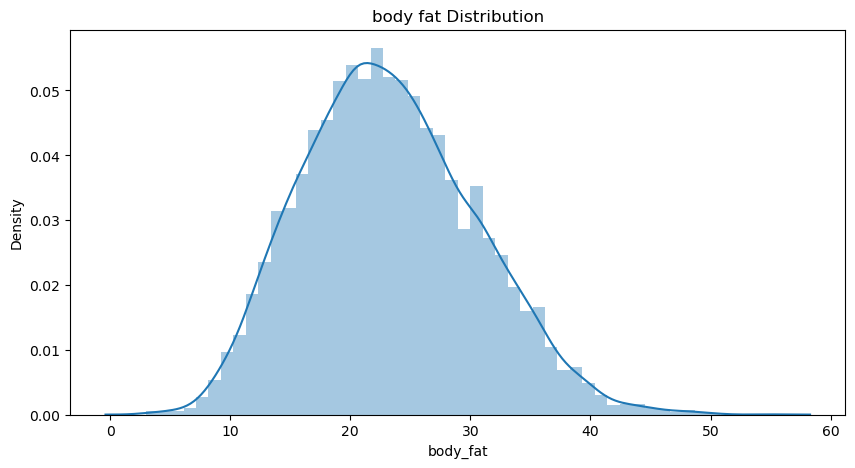

In [33]:
plt.figure(figsize=(10, 5))
plt.title('body fat Distribution')
sns.distplot(training_data['body_fat'])
plt.show()

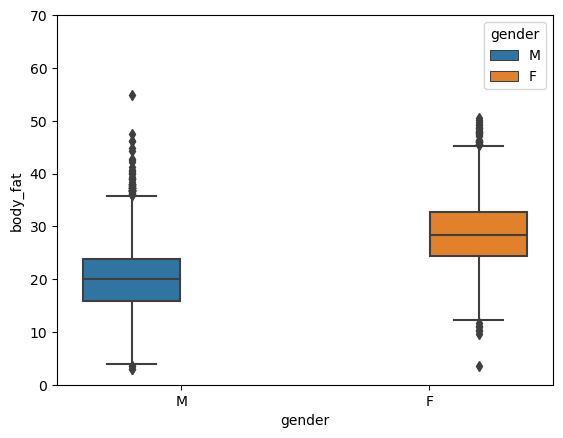

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

var = 'body_fat'
sns.boxplot(x='gender', y=var, data=training_data, hue='gender')
plt.ylim(0, 70)
plt.show()



<AxesSubplot:xlabel='age', ylabel='body_fat'>

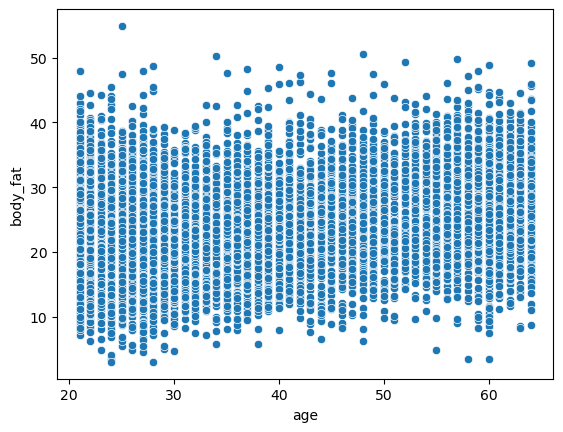

In [35]:
sns.scatterplot(y="body_fat", x="age", data=training_data)

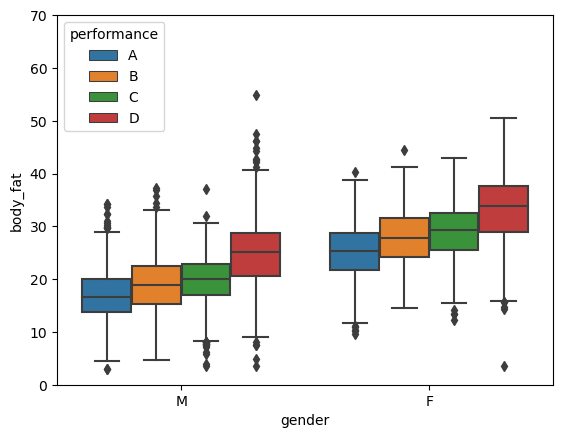

In [36]:

var = 'body_fat'
sns.boxplot(x='gender', y=var, data=training_data, hue='performance',hue_order = ['A','B','C','D'])
plt.ylim(0, 70)
plt.show()


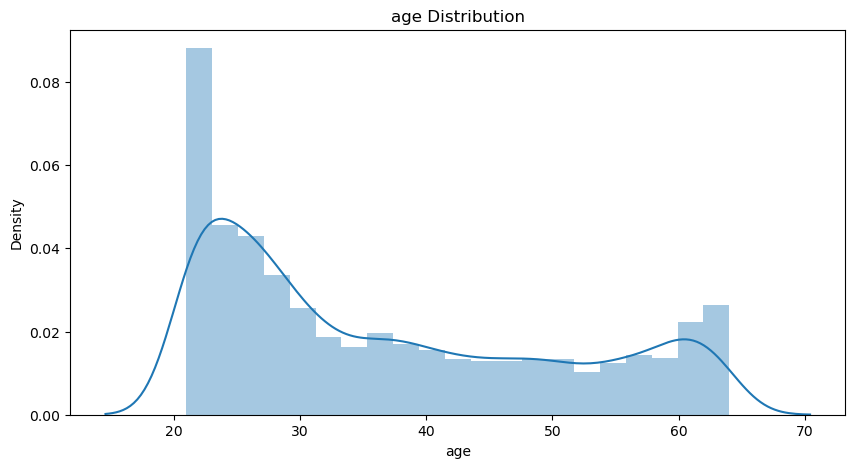

In [37]:
plt.figure(figsize=(10, 5))
plt.title('age Distribution')
sns.distplot(training_data['age'])
plt.show()

In [26]:
def age_dist (age):
    if age>=20 and age < 39: 
        return '20-39' 
    elif age >= 40 and age < 59:
        return '40-59'
    else:
        return '60-79'
    
training_data['age_dist'] = training_data['age'].apply(age_dist)
training_data.head()

,age,gender,body_fat,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI,class,MAP,age_dist
415,25,M,20.5,54.7,28.5,38.0,217.0,C,26.23,2,2,103.33,20-39
9229,60,M,10.6,55.9,20.6,43.0,198.0,A,21.16,0,0,110.67,60-79
6124,63,M,22.8,33.3,24.2,30.0,191.0,C,24.87,0,2,105.67,60-79
10788,37,M,14.2,48.9,10.9,48.0,242.0,B,25.54,2,1,108.00,20-39
6532,46,M,16.5,58.5,15.4,46.0,225.0,A,24.45,0,0,105.00,40-59


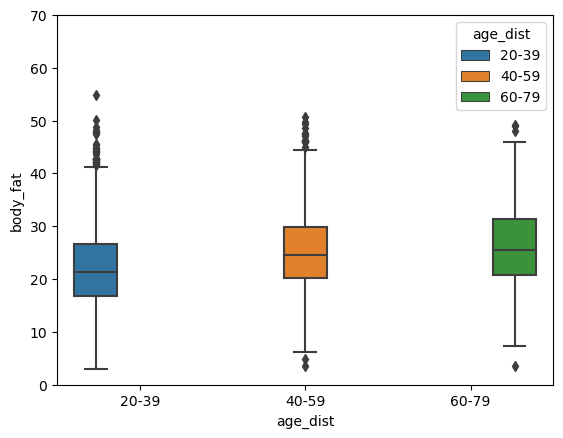

In [8]:
var = 'body_fat'
sns.boxplot(x='age_dist', y=var, data=training_data, hue='age_dist',hue_order=['20-39','40-59','60-79'],order=['20-39','40-59','60-79'])
plt.ylim(0, 70)
plt.show()


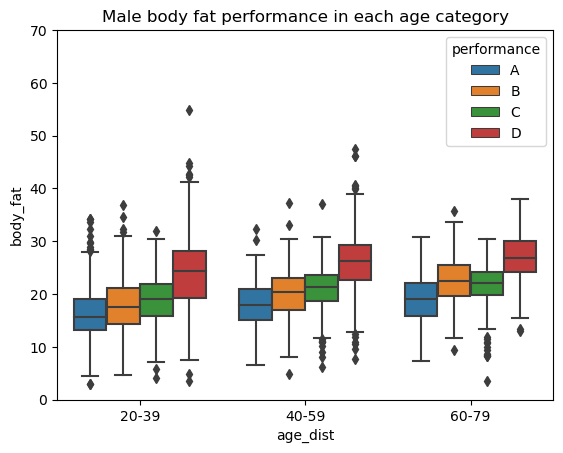

In [9]:
var = 'body_fat'
male_data = training_data[training_data['gender'] == 'M']
male_data.head()
plt.title('Male body fat performance in each age category')
sns.boxplot(x='age_dist', y=var, data=male_data, hue='performance',hue_order = ['A','B','C','D'],order=['20-39','40-59','60-79'])
plt.ylim(0, 70)
plt.show()

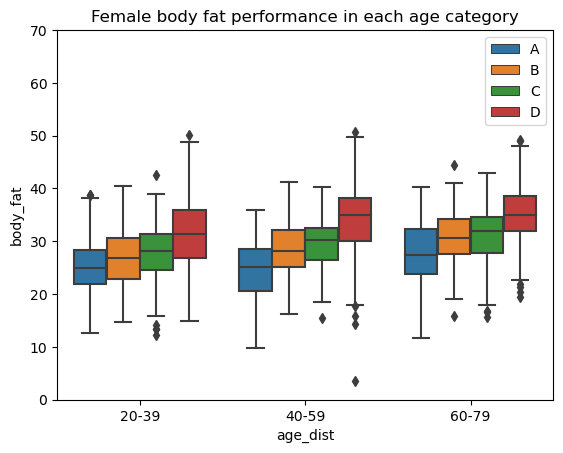

In [10]:
var = 'body_fat'
female_data = training_data[training_data['gender'] == 'F']
female_data.head()
plt.title('Female body fat performance in each age category')
sns.boxplot(x='age_dist', y=var, data=female_data, hue='performance',hue_order = ['A','B','C','D'],order=['20-39','40-59','60-79'])
# adjust legend
plt.legend( loc='upper right')

plt.ylim(0, 70)
plt.show()

# sit and bend forward

In [41]:
training_data.head()

,age,gender,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,class,age_dist
415,25.0,M,20.5,84.0,142.0,54.7,28.5,38.0,217.0,C,26.23,2,20-39
9229,60.0,M,10.6,92.0,148.0,55.9,20.6,43.0,198.0,A,21.16,0,60-79
6124,63.0,M,22.8,79.0,159.0,33.3,24.2,30.0,191.0,C,24.87,2,60-79
10788,37.0,M,14.2,92.0,140.0,48.9,10.9,48.0,242.0,B,25.54,1,20-39
6532,46.0,M,16.5,82.0,151.0,58.5,15.4,46.0,225.0,A,24.45,0,40-59


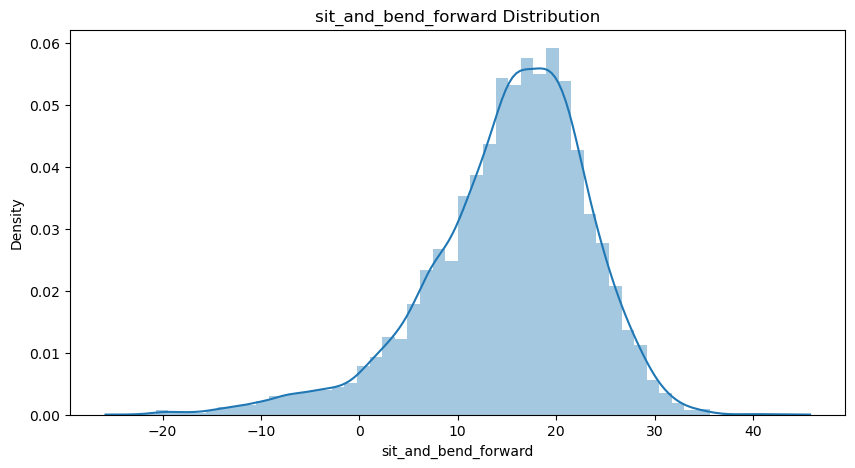

In [42]:
plt.figure(figsize=(10, 5))
plt.title('sit_and_bend_forward Distribution')
sns.distplot(training_data['sit_and_bend_forward'])
plt.show()

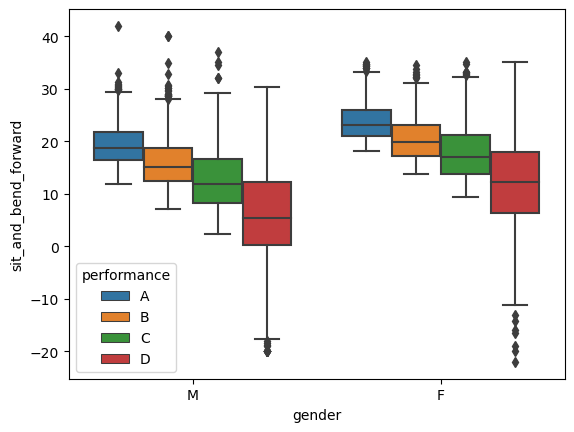

In [43]:
import seaborn as sns
var = 'sit_and_bend_forward'
sns.boxplot(x='gender', y=var, data=training_data,hue='performance',hue_order = ['A','B','C','D'])
#plt.ylim(-30, 70)
plt.show()


# broad_jump

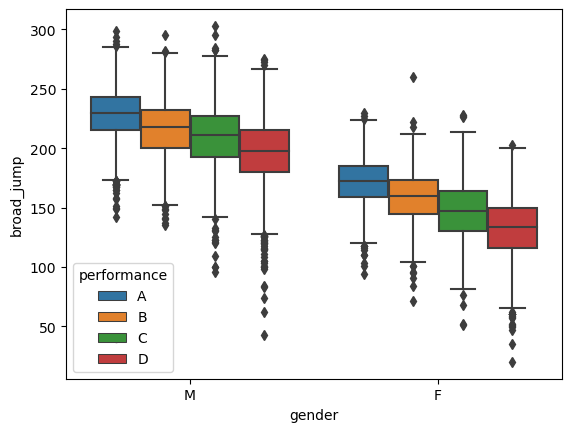

In [44]:
var = 'broad_jump'
sns.boxplot(x='gender', y=var, data=training_data,hue='performance',hue_order = ['A','B','C','D'])
#plt.ylim(0, 70)
plt.show()

# gripForce

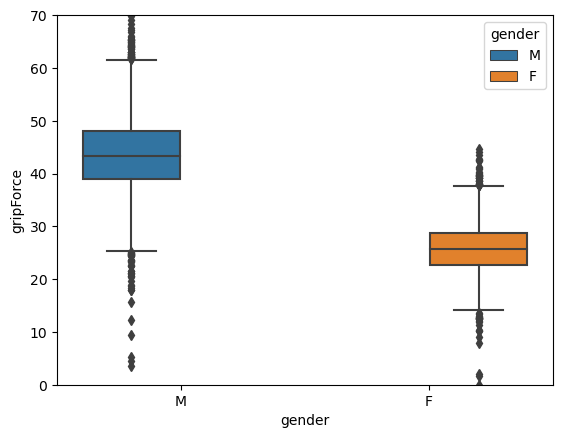

In [29]:
var = 'gripForce'
sns.boxplot(x='gender', y=var, data=training_data, hue='gender')
plt.ylim(0, 70)
plt.show()


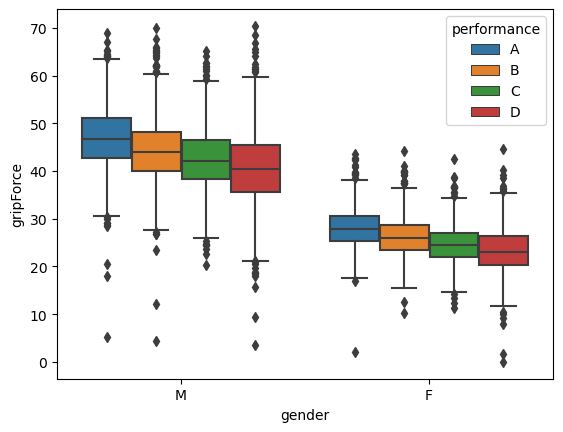

In [45]:
var = 'gripForce'
sns.boxplot(x='gender', y=var, data=training_data,hue='performance',hue_order = ['A','B','C','D'])
#plt.ylim(0, 70)
plt.show()

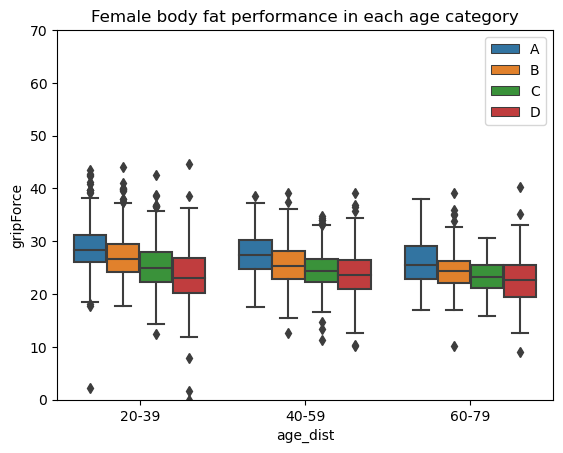

In [26]:
var = 'gripForce'
female_data = training_data[training_data['gender'] == 'F']
female_data.head()
plt.title('Female grip Force performance in each age category')
sns.boxplot(x='age_dist', y=var, data=female_data, hue='performance',hue_order = ['A','B','C','D'],order=['20-39','40-59','60-79'])
# adjust legend
plt.legend( loc='upper right')

plt.ylim(0, 70)
plt.show()

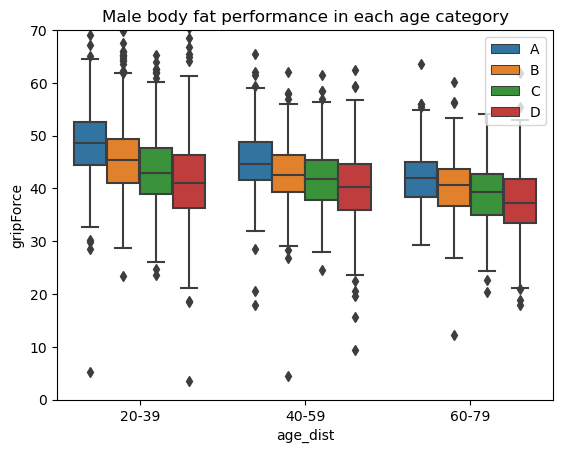

In [28]:
var = 'gripForce'
female_data = training_data[training_data['gender'] == 'M']
female_data.head()
plt.title('Male grip Force performance in each age category')
sns.boxplot(x='age_dist', y=var, data=female_data, hue='performance',hue_order = ['A','B','C','D'],order=['20-39','40-59','60-79'])
# adjust legend
plt.legend( loc='upper right')

plt.ylim(0, 70)
plt.show()

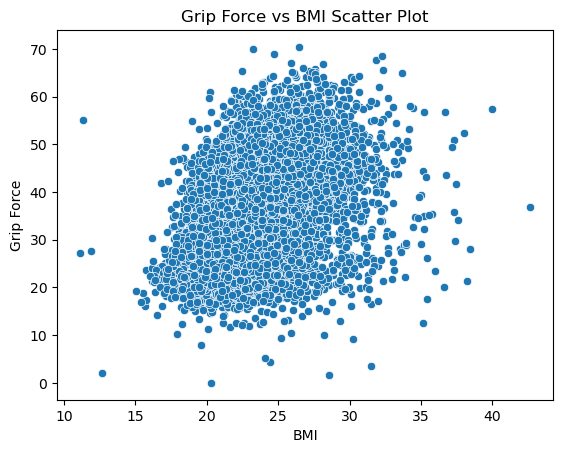

In [28]:
import seaborn as sns

sns.scatterplot(x="BMI_val", y="gripForce", data=training_data)
plt.xlabel("BMI")
plt.ylabel("Grip Force")
plt.title("Grip Force vs BMI Scatter Plot")
plt.show()



In [29]:
from scipy.stats import spearmanr

# Extract grip force and BMI from the training data
grip_force = training_data['gripForce']
bmi = training_data['BMI_val']

# Compute Spearman's rank correlation coefficient
corr, p_val = spearmanr(bmi, grip_force)

# Print the result
print("Spearman's rank correlation coefficient: ", corr)
print("p-value: ", p_val)


Spearman's rank correlation coefficient:  0.4496909112012312
p-value:  0.0


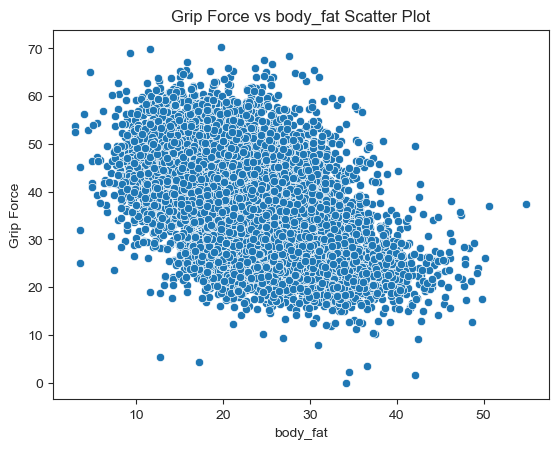

In [36]:
import seaborn as sns

sns.scatterplot(x="body_fat", y="gripForce", data=training_data)
plt.xlabel("body_fat")
plt.ylabel("Grip Force")
plt.title("Grip Force vs body_fat Scatter Plot")
plt.show()


In [37]:
from scipy.stats import spearmanr

# Extract grip force and BMI from the training data
grip_force = training_data['gripForce']
bodyfat = training_data['body_fat']

# Compute Spearman's rank correlation coefficient
corr, p_val = spearmanr(bodyfat, grip_force)

# Print the result
print("Spearman's rank correlation coefficient: ", corr)
print("p-value: ", p_val)

Spearman's rank correlation coefficient:  -0.5604075145456473
p-value:  0.0


In [39]:
from scipy.stats import spearmanr

# Extract grip force and BMI from the training data
grip_force = training_data['gripForce']
bodyfat = training_data['age']

# Compute Spearman's rank correlation coefficient
corr, p_val = spearmanr(bodyfat, grip_force)

# Print the result
print("Spearman's rank correlation coefficient: ", corr)
print("p-value: ", p_val)

Spearman's rank correlation coefficient:  -0.12234598590562776
p-value:  5.909268486628221e-37


In [38]:
training_data.head()

,age,gender,body_fat,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI,class,MAP,age_dist
415,25,M,20.5,54.7,28.5,38.0,217.0,C,26.23,2,2,103.33,20-39
9229,60,M,10.6,55.9,20.6,43.0,198.0,A,21.16,0,0,110.67,60-79
6124,63,M,22.8,33.3,24.2,30.0,191.0,C,24.87,0,2,105.67,60-79
10788,37,M,14.2,48.9,10.9,48.0,242.0,B,25.54,2,1,108.00,20-39
6532,46,M,16.5,58.5,15.4,46.0,225.0,A,24.45,0,0,105.00,40-59


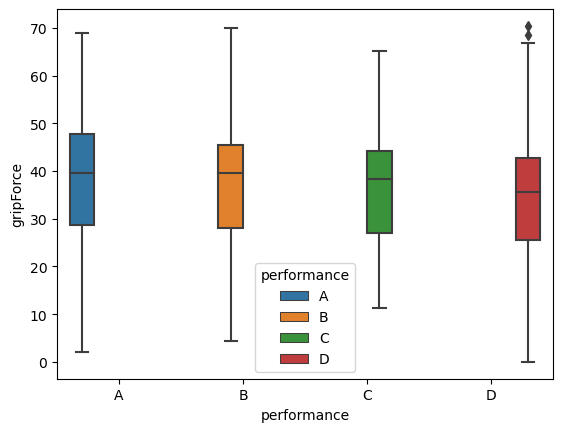

In [46]:
var = 'gripForce'
sns.boxplot(x='performance', y=var, data=training_data,hue='performance',hue_order = ['A','B','C','D'],order = ['A','B','C','D'])
#plt.ylim(-10, 120)
plt.show()

# sit ups

In [55]:
training_data.head()

,age,gender,height,weight,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI,age_dist
8045,27.0,M,173.8,87.00,24.1,95.0,158.0,39.9,22.5,50.0,189.0,D,28.80,overweight,20-39
12964,22.0,F,160.7,45.80,23.4,79.0,125.0,23.8,32.2,35.0,143.0,B,17.74,underweight,20-39
12642,49.0,F,149.9,61.60,40.7,95.0,129.0,22.7,19.2,8.0,148.0,D,27.41,overweight,40-59
9002,36.0,M,179.6,81.10,15.9,80.0,131.0,51.2,6.8,46.0,216.0,C,25.14,overweight,20-39
12596,30.0,M,168.6,69.64,21.9,99.0,137.0,43.7,20.9,59.0,242.0,A,24.50,normal,20-39


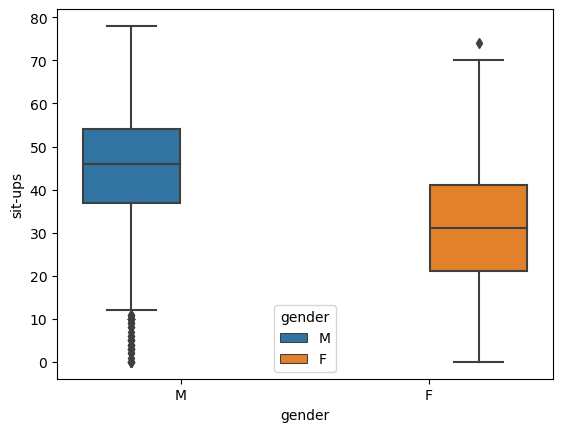

In [56]:
var = 'sit-ups'
sns.boxplot(x='gender', y=var, data=training_data, hue='gender')

plt.show()

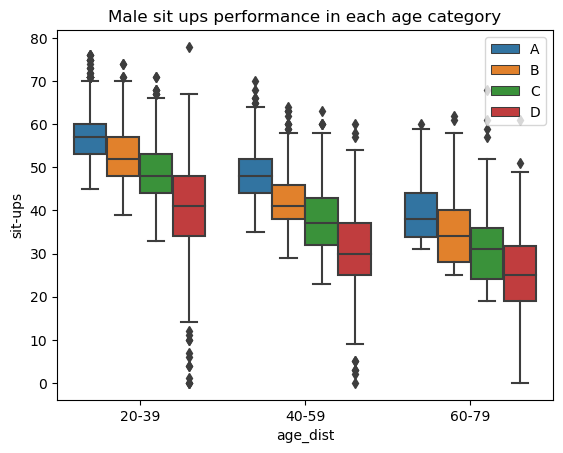

In [58]:
var = 'sit-ups'
female_data = training_data[training_data['gender'] == 'M']
female_data.head()
plt.title('Male sit ups performance in each age category')
sns.boxplot(x='age_dist', y=var, data=female_data, hue='performance',hue_order = ['A','B','C','D'],order=['20-39','40-59','60-79'])
# adjust legend
plt.legend( loc='upper right')

plt.show()

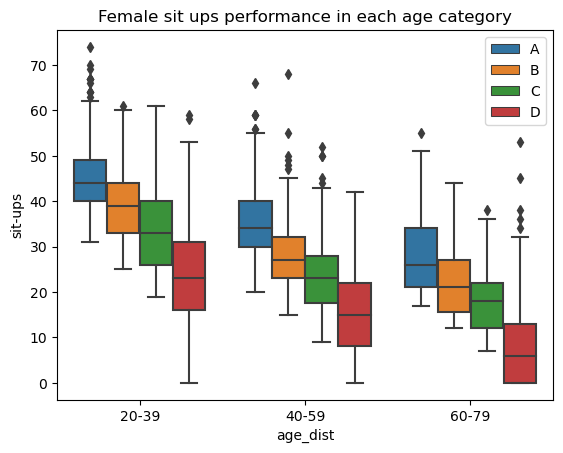

In [59]:
var = 'sit-ups'
female_data = training_data[training_data['gender'] == 'F']
female_data.head()
plt.title('Female sit ups performance in each age category')
sns.boxplot(x='age_dist', y=var, data=female_data, hue='performance',hue_order = ['A','B','C','D'],order=['20-39','40-59','60-79'])
# adjust legend
plt.legend( loc='upper right')

plt.show()

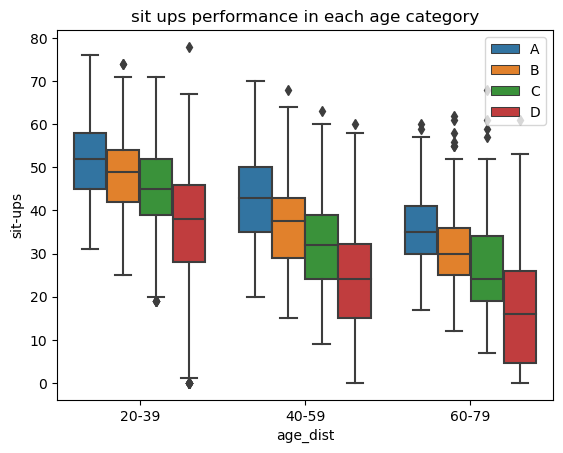

In [60]:
var = 'sit-ups'
#female_data = training_data[training_data['gender'] == 'F']
#female_data.head()
plt.title('sit ups performance in each age category')
sns.boxplot(x='age_dist', y=var, data=training_data, hue='performance',hue_order = ['A','B','C','D'],order=['20-39','40-59','60-79'])
# adjust legend
plt.legend( loc='upper right')

plt.show()

# BMI_val

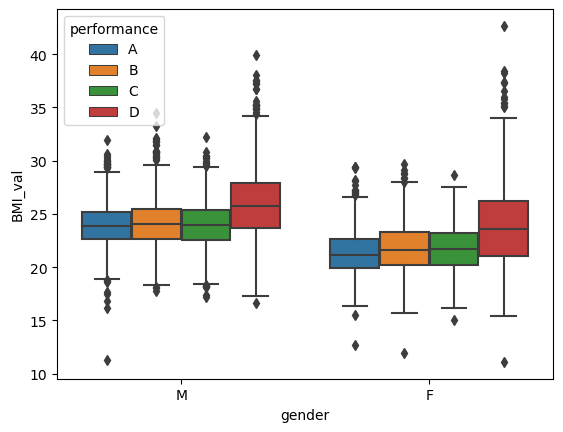

In [47]:
var = 'BMI_val'
sns.boxplot(x='gender', y=var, data=training_data,hue='performance',hue_order = ['A','B','C','D'])
#plt.ylim(0, 70)
plt.show()

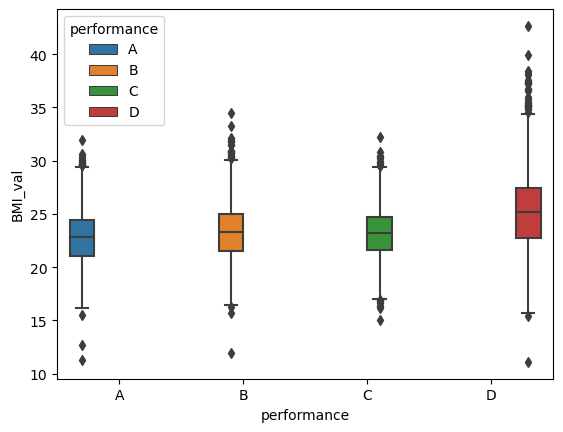

In [11]:
var = 'BMI_val'
sns.boxplot(x='performance', y=var, data=training_data,hue='performance',hue_order = ['A','B','C','D'],order = ['A','B','C','D'])
#plt.ylim(-10, 120)
plt.show()

In [47]:
training_data.head()

,age,gender,height,weight,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI
8045,27.0,M,173.8,87.00,24.1,95.0,158.0,39.9,22.5,50.0,189.0,D,28.80,overweight
12964,22.0,F,160.7,45.80,23.4,79.0,125.0,23.8,32.2,35.0,143.0,B,17.74,underweight
12642,49.0,F,149.9,61.60,40.7,95.0,129.0,22.7,19.2,8.0,148.0,D,27.41,overweight
9002,36.0,M,179.6,81.10,15.9,80.0,131.0,51.2,6.8,46.0,216.0,C,25.14,overweight
12596,30.0,M,168.6,69.64,21.9,99.0,137.0,43.7,20.9,59.0,242.0,A,24.50,normal


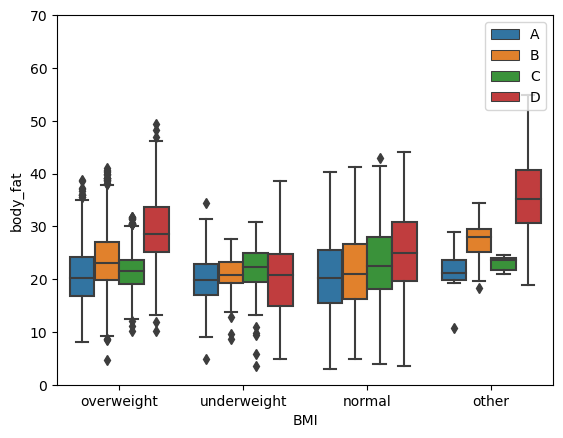

In [49]:
var = 'body_fat'
#female_data = training_data[training_data['gender'] == 'M']
#female_data.head()

sns.boxplot(x='BMI', y=var, data=training_data, hue='performance',hue_order = ['A','B','C','D'])
# adjust legend
plt.legend( loc='upper right')

plt.ylim(0, 70)
plt.show()

# Diastolic and systolic

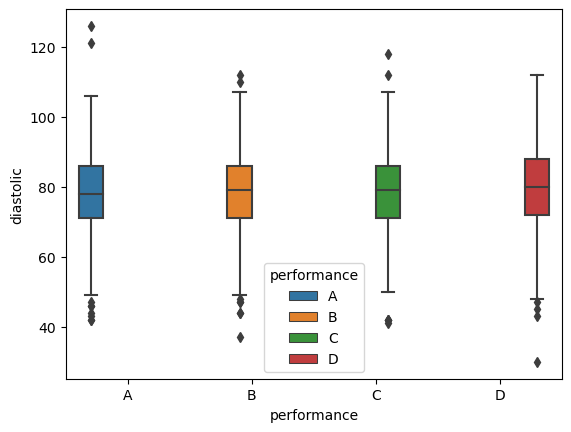

In [49]:
var = 'diastolic'
sns.boxplot(x='performance', y=var, data=training_data,hue='performance',hue_order = ['A','B','C','D'],order = ['A','B','C','D'])
#plt.ylim(-10, 120)
plt.show()

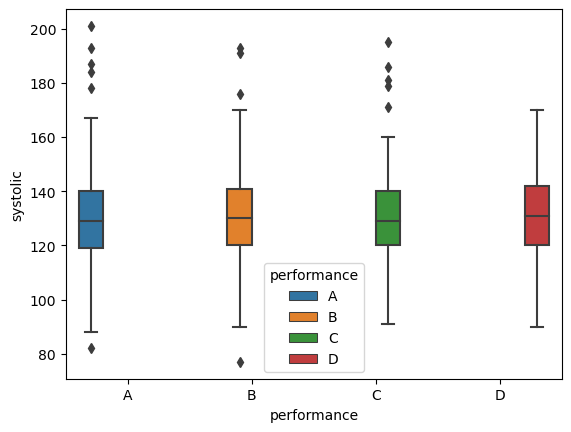

In [50]:
var = 'systolic'
sns.boxplot(x='performance', y=var, data=training_data,hue='performance',hue_order = ['A','B','C','D'],order = ['A','B','C','D'])
#plt.ylim(-10, 120)
plt.show()

# gender

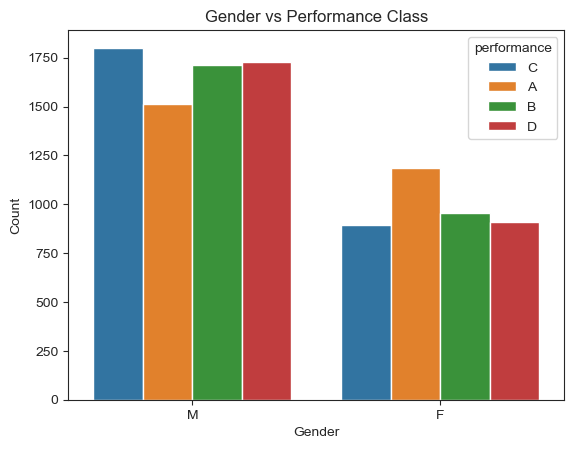

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar chart
sns.countplot(x="gender", hue="performance", data=training_data)

# Set the plot title and labels
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender vs Performance Class")

# Show the plot
plt.show()


# pls

In [63]:
training_data.head()

,age,gender,body_fat,diastolic,systolic,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,class,age_dist
415,25.0,1,20.5,84.0,142.0,54.7,28.5,38.0,217.0,C,26.23,2,20-39
9229,60.0,1,10.6,92.0,148.0,55.9,20.6,43.0,198.0,A,21.16,0,60-79
6124,63.0,1,22.8,79.0,159.0,33.3,24.2,30.0,191.0,C,24.87,2,60-79
10788,37.0,1,14.2,92.0,140.0,48.9,10.9,48.0,242.0,B,25.54,1,20-39
6532,46.0,1,16.5,82.0,151.0,58.5,15.4,46.0,225.0,A,24.45,0,40-59


In [12]:
gender = {'F':0,'M':1}
training_data['gender'] =training_data['gender'].replace(gender)
training_data.head()

,age,gender,body_fat,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI,class,MAP,age_dist
415,25,1,20.5,54.7,28.5,38.0,217.0,C,26.23,2,2,103.33,20-39
9229,60,1,10.6,55.9,20.6,43.0,198.0,A,21.16,0,0,110.67,60-79
6124,63,1,22.8,33.3,24.2,30.0,191.0,C,24.87,0,2,105.67,60-79
10788,37,1,14.2,48.9,10.9,48.0,242.0,B,25.54,2,1,108.00,20-39
6532,46,1,16.5,58.5,15.4,46.0,225.0,A,24.45,0,0,105.00,40-59


In [13]:
x = training_data.drop(["performance","age_dist","class"],axis=1)
y = training_data["class"]
x.head()

,age,gender,body_fat,gripForce,sit_and_bend_forward,sit-ups,broad_jump,BMI_val,BMI,MAP
415,25,1,20.5,54.7,28.5,38.0,217.0,26.23,2,103.33
9229,60,1,10.6,55.9,20.6,43.0,198.0,21.16,0,110.67
6124,63,1,22.8,33.3,24.2,30.0,191.0,24.87,0,105.67
10788,37,1,14.2,48.9,10.9,48.0,242.0,25.54,2,108.00
6532,46,1,16.5,58.5,15.4,46.0,225.0,24.45,0,105.00


In [54]:
from sklearn.cross_decomposition import PLSRegression

model_pls = PLSRegression(scale=True, n_components=2, max_iter=500, tol=1e-06, copy=True)
model_pls.fit(x, y)

print(model_pls.get_params()) # to get information about the model's parameters


{'copy': True, 'max_iter': 500, 'n_components': 2, 'scale': True, 'tol': 1e-06}


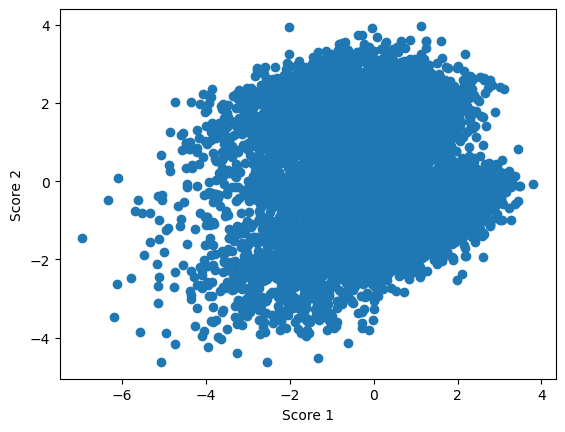

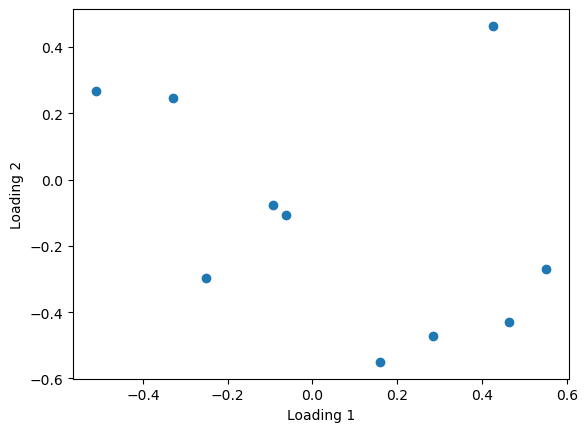

In [55]:


# Get the scores and loading plots
scores = model_pls.transform(x)
loadings = model_pls.x_loadings_

# Plot the scores
import matplotlib.pyplot as plt
plt.scatter(scores[:, 0], scores[:, 1])
plt.xlabel('Score 1')
plt.ylabel('Score 2')
plt.show()

# Plot the loadings
plt.scatter(loadings[:, 0], loadings[:, 1])
plt.xlabel('Loading 1')
plt.ylabel('Loading 2')
plt.show()

In [14]:

training_data.head()

,age,gender,body_fat,gripForce,sit_and_bend_forward,sit-ups,broad_jump,performance,BMI_val,BMI,class,MAP,age_dist
415,25,1,20.5,54.7,28.5,38.0,217.0,C,26.23,2,2,103.33,20-39
9229,60,1,10.6,55.9,20.6,43.0,198.0,A,21.16,0,0,110.67,60-79
6124,63,1,22.8,33.3,24.2,30.0,191.0,C,24.87,0,2,105.67,60-79
10788,37,1,14.2,48.9,10.9,48.0,242.0,B,25.54,2,1,108.00,20-39
6532,46,1,16.5,58.5,15.4,46.0,225.0,A,24.45,0,0,105.00,40-59


In [15]:
import pandas as pd

# save the edited dataset as a CSV file
training_data.to_csv('training_data2.csv', index=False)


In [22]:
df.drop(['gender','performance','BMI','class'],axis=1, inplace=True)
df.head()

,age,body_fat,gripForce,sit_and_bend_forward,sit-ups,broad_jump,BMI_val,MAP
0,27,21.3,54.9,18.4,60.0,217.0,25.34,96.67
1,25,15.7,36.4,16.3,53.0,229.0,20.50,93.33
2,31,20.1,44.8,12.0,49.0,181.0,24.18,112.00
3,32,18.4,41.4,15.2,53.0,219.0,23.35,99.67
4,28,17.1,43.5,27.1,45.0,217.0,22.41,89.00


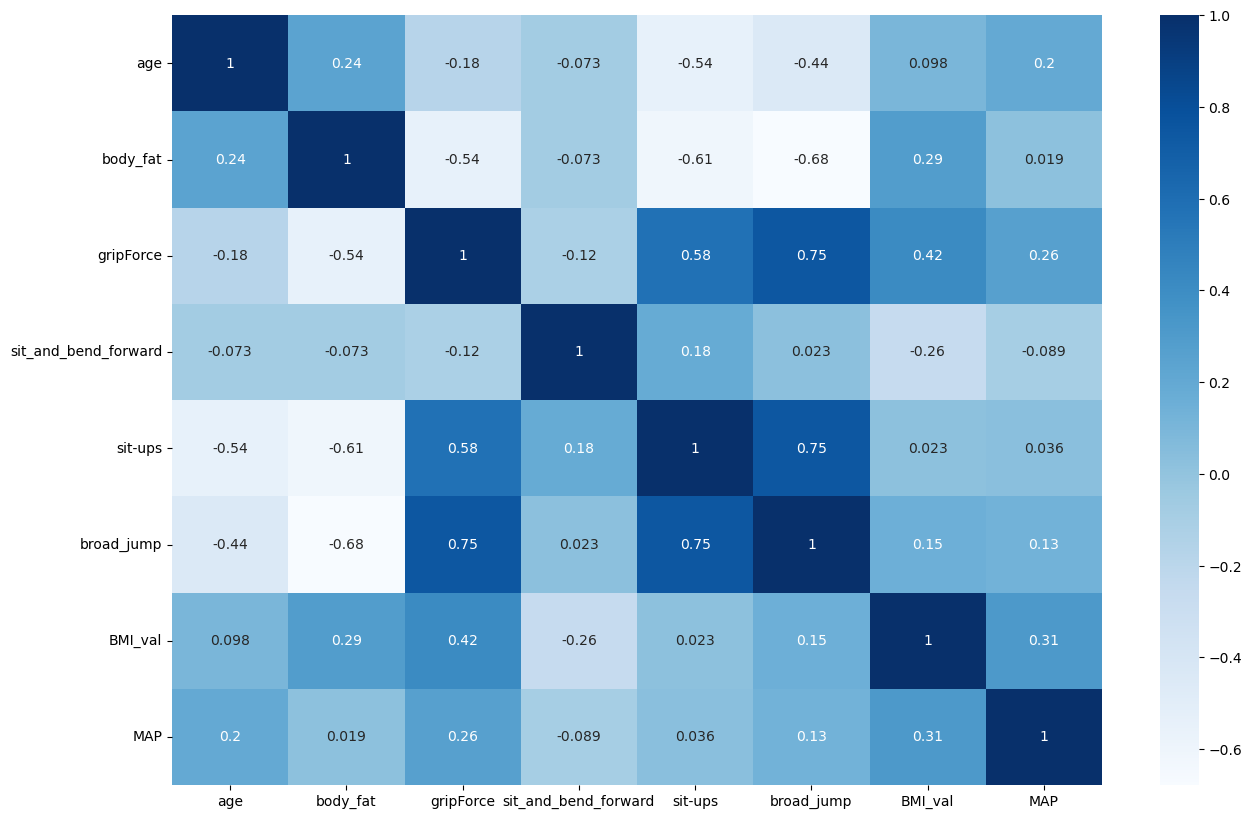

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()
